In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [11]:
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

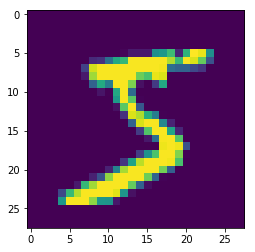

In [15]:
temp = X_train[0].reshape((28,28))
plt.imshow(temp)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
def mnist_model():
    model = Sequential()
    model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [29]:
model = mnist_model()

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 431s 7ms/step - loss: 0.1990 - accuracy: 0.9431 - val_loss: 0.0589 - val_accuracy: 0.9809
Epoch 2/3
25344/60000 [===========>..................] - ETA: 3:31 - loss: 0.0573 - accuracy: 0.9827

KeyboardInterrupt: 

In [31]:
scores = model.evaluate(X_test,y_test,verbose=1)

10000/10000 [==============================] - 31s 3ms/step


In [34]:
scores

[0.04992511440906674, 0.9825999736785889]

In [39]:
import collections
import numpy as np

In [41]:
temp = np.argmax(y_train, axis=1)
temp

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [43]:
collections.Counter(temp)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [44]:
temp = np.argmax(y_test, axis=1)
temp

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [45]:
collections.Counter(temp)

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

In [49]:
from sklearn import metrics

In [51]:
y_pred = model.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [52]:
matrix

array([[ 975,    0,    0,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1129,    1,    1,    0,    1,    3,    0,    0,    0],
       [   4,    4, 1008,    2,    3,    1,    2,    6,    2,    0],
       [   0,    0,    4,  995,    0,    3,    0,    4,    3,    1],
       [   1,    0,    0,    0,  978,    0,    2,    0,    0,    1],
       [   2,    0,    0,    8,    0,  876,    3,    0,    0,    3],
       [   6,    2,    0,    0,    1,    4,  944,    0,    1,    0],
       [   1,    5,   10,    2,    0,    0,    0, 1009,    1,    0],
       [   7,    1,    2,    1,    8,    4,    5,    3,  938,    5],
       [   4,    6,    0,    1,   15,    2,    0,    6,    1,  974]],
      dtype=int64)